#ניתוח סטטיסטי של שתי מערכות הבחירות - 2020 ו2021
##תומר וייס 205439789
##טמיראת יטנה 327067450
##ולריה לרמן 212366025

In [ ]:
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
import io
import statsmodels.formula.api as sm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.lines as mlines
import scipy as sy
import plotly.graph_objects as go
from sklearn.preprocessing import normalize
import seaborn as sn

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##חלק א

טעינת כל הקבצים בהם השתמשנו:

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving eshkol_hevrati_calcali.csv to eshkol_hevrati_calcali.csv
Saving eshkol_hevrati_calcali.xlsx to eshkol_hevrati_calcali.xlsx
Saving votes per ballot 2020.csv to votes per ballot 2020.csv
Saving votes per ballot 2021.csv to votes per ballot 2021.csv
Saving votes per city 2020.csv to votes per city 2020.csv
Saving votes per city 2021.csv to votes per city 2021.csv


##חלק ב

הוספת מילונים לשתי מערכות הבחירות כדי לתרגם את אותיות ההצבעות לשמות הרשמיים של המפלגות

In [ ]:
parties_dict_2020 ={'אמת' : "עבודה גשר מרצ", 'ג' : "יהדות התורה",  'נץ'  : "עוצמה יהודית",
                    'ודעם'  : "הרשימה המשותפת", 'טב'  : "ימינה", 'ל'  : "ישראל ביתנו",
                    'מחל'  : "הליכוד",  'פה'  : "כחול לבן", 'שס'  : "שס"}

parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}

הורדת יישוב מעטפות חיצוניות ועמודות לא רלוונטיות, שינוי אותיות ההצבעה לשמות המפלגות הרשמיים:

In [ ]:
df_2021_raw_cities = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading cities data
df_2021_raw_cities = df_2021_raw_cities[df_2021_raw_cities.index != 'מעטפות חיצוניות'] # dropping out מעטפות חיצוניות
df_2021 = df_2021_raw_cities.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021 = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns

df_2021_raw_ballots = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2021.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading cities data
df_2021_raw_ballots = df_2021_raw_ballots[df_2021_raw_ballots.index != 'מעטפות חיצוניות'] # dropping out מעטפות חיצוניות
df_2021_ballots = df_2021_raw_ballots.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021_ballots = df_2021_ballots[df_2021_ballots.columns[9:]] # removing "metadata" columns
names_2021=df_2021_ballots.columns

biggest_13_names=['ודעם', 'עם', 'מרצ', 'אמת', 'פה', 'כן', 'ל','ת', 'ג', 'שס', 'מחל', 'ב', 'ט']

df_2021.rename(columns=parties_dict_2021, inplace=True)
df_2021_ballots.rename(columns=parties_dict_2021, inplace=True)



עיבוד מקדים של קובץ יישובים וקובץ קלפיות עבור בחירות 2020 - פיצול ואיחוד מפלגות רלוונטיות כדי שנוכל להשוות את התפלגות הקולות למפלגת העבודה בין שתי מערכות הבחירות

In [ ]:
parties_dict_2020 ={'אמת' : "עבודה גשר מרצ", 'ג' : "יהדות התורה", 'ודעם'  : "הרשימה המשותפת"
    , 'טב'  : "ימינה", 'נץ'  : "עוצמה יהודית", 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "כחול לבן", 'שס'  : "שס"}

df_2020_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2020.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2020_raw.rename(columns=parties_dict_2020, inplace=True)
df_2020_raw = df_2020_raw[df_2020_raw.columns[:-1]]

df_2020_raw_ballots = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2020.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2020_raw_ballots.rename(columns=parties_dict_2020, inplace=True)
df_2020_raw_ballots = df_2020_raw_ballots[df_2020_raw.columns[:-1]]
df_2020_ballots = df_2020_raw_ballots.drop('סמל ועדה', axis=1) 
df_2020_ballots = df_2020_ballots[df_2020_ballots.columns[5:]] # removing "metadata" columns

#Now we will merge the parties that are togeter in 2020 but were seperated in 2021:

#splitting to עבודה and מרצ 
df_2020_raw['מרצ'], df_2020_raw['עבודה'] = 0.5 *df_2020_raw['עבודה גשר מרצ'], 0.5 *df_2020_raw['עבודה גשר מרצ']
df_2020_raw.drop('עבודה גשר מרצ', axis=1)
#splitting to רעם and המשותפת
df_2020_raw['רעם'], df_2020_raw['הרשימה המשותפת'] = 0.4 *df_2020_raw['הרשימה המשותפת'], 0.6 *df_2020_raw['הרשימה המשותפת']
#splitting to תקוה חדשה and הליכוד
df_2020_raw['תקוה חדשה'], df_2020_raw['הליכוד'] = 0.167 *df_2020_raw['הליכוד'], 0.833 *df_2020_raw['הליכוד']
#splitting to כחול לבן and יש עתיד
df_2020_raw['כחול לבן'], df_2020_raw['יש עתיד'] = 0.333 *df_2020_raw['כחול לבן'], 0.667 *df_2020_raw['כחול לבן']
#splitting to ימינה and הציונות הדתית
df_2020_raw['ימינה'], df_2020_raw['הציונות הדתית'] = 0.6 *df_2020_raw['ימינה'], 0.4*df_2020_raw['ימינה']
df_2020_raw['הציונות הדתית'] = df_2020_raw['עוצמה יהודית']
df_2020_raw.drop('עוצמה יהודית', axis = 1)
df_2020_raw.drop('סמל ועדה', axis=1) 

df_2020 = df_2020_raw[df_2020_raw.columns[6:]] # removing "metadata" columns
df_2020


,עבודה גשר מרצ,יהדות התורה,הרשימה המשותפת,ז,זך,זץ,ימינה,י,יז,ינ,יף,יק,יר,כ,כן,ישראל ביתנו,הליכוד,נ,נז,ני,עוצמה יהודית,נק,כחול לבן,ףז,ץ,ק,קי,קך,קץ,שס,מרצ,עבודה,רעם,תקוה חדשה,יש עתיד,הציונות הדתית
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,13,0,332.4,0,0,0,0.0,0,1,0,0,0,0,0,1,1,3.332,0,1,0,0,0,2.664,2,0,0,0,0,2,2,6.5,6.5,221.6,0.668,5.336,0
אבו גוש,75,4,1294.2,0,0,0,3.0,0,0,5,1,0,1,0,0,5,233.240,0,0,0,3,2,40.959,0,2,0,0,1,4,14,37.5,37.5,862.8,46.760,82.041,3
אבו סנאן,92,6,2674.8,0,1,0,9.6,1,2,13,2,0,1,1,2,230,158.270,3,2,1,3,3,250.416,0,2,2,1,2,4,247,46.0,46.0,1783.2,31.730,501.584,3
אבו עבדון שבט,0,0,24.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0,0,0.000,0,0,0,0,0,0,0,0.0,0.0,16.0,0.000,0.000,0
אבו קורינאת שבט,9,0,757.8,0,0,0,0.6,0,0,3,0,0,1,0,0,0,6.664,0,1,2,1,0,10.989,0,2,1,0,2,1,0,4.5,4.5,505.2,1.336,22.011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
תקומה,5,5,0.0,0,0,0,97.8,0,0,0,0,0,0,0,0,1,134.113,1,0,0,2,1,20.979,0,0,0,0,0,0,12,2.5,2.5,0.0,26.887,42.021,2
תקוע,28,33,1.8,7,0,0,456.0,0,0,0,0,0,0,5,1,35,485.639,2,0,0,29,0,28.305,2,0,1,0,2,5,34,14.0,14.0,1.2,97.361,56.695,29
תראבין אצאנע שבט,0,0,25.8,0,1,0,0.0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0,0,1.332,0,0,0,0,0,0,0,0.0,0.0,17.2,0.000,2.668,0


In [ ]:
df_2020_raw_ballots

,סמל ועדה,סמל ישוב,בזב,מצביעים,פסולים,כשרים,עבודה גשר מרצ,יהדות התורה,הרשימה המשותפת,ז,זך,זץ,ימינה,י,יז,ינ,יף,יק,יר,כ,כן,ישראל ביתנו,הליכוד,נ,נז,ני,עוצמה יהודית,נק,כחול לבן,ףז,ץ,ק,קי,קך,קץ
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,18,967,585,126,2,124,2,0,112,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0,0,0
אבו גווייעד שבט,18,967,764,249,2,247,6,0,235,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,2
אבו גווייעד שבט,18,967,669,220,2,218,5,0,207,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,2,1,0,0,0,0,0
אבו גוש,2,472,530,299,7,292,15,1,229,0,0,0,0,0,0,1,0,0,1,0,0,0,32,0,0,0,0,0,11,0,0,0,0,0,0
אבו גוש,2,472,693,388,6,382,6,0,330,0,0,0,0,0,0,2,0,0,0,0,0,2,23,0,0,0,0,0,18,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
תקוע,2,3563,672,496,1,495,10,14,2,3,0,0,174,0,0,0,0,0,0,1,1,15,227,0,0,0,9,0,27,0,0,0,0,1,0
תקוע,2,3563,725,572,1,571,7,8,0,1,0,0,301,0,0,0,0,0,0,0,0,10,188,2,0,0,9,0,25,1,0,1,0,1,4
תראבין אצאנע שבט,18,970,520,48,0,48,0,0,43,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0


בניית גרפים שמראים את השינוי במספר הקולות ואחוז ההצבעה עבור מפלגת העבודה בין שתי מערכות הבחירות

התפלגות קולות בשנת 2020 ובשנת 2021

In [ ]:
par = df_2020.sum().div(df_2020.sum().sum()).sort_values(ascending=False)
par

הליכוד            0.235655
יש עתיד           0.170268
כחול לבן          0.085006
שס                0.073808
הרשימה המשותפת    0.072982
יהדות התורה       0.057406
עבודה גשר מרצ     0.055950
ישראל ביתנו       0.055090
רעם               0.048655
תקוה חדשה         0.047244
ימינה             0.030208
עבודה             0.027975
מרצ               0.027975
עוצמה יהודית      0.004058
הציונות הדתית     0.004058
ז                 0.000791
נ                 0.000580
ףז                0.000308
קץ                0.000288
ק                 0.000205
כן                0.000170
ינ                0.000142
קך                0.000142
נז                0.000140
נק                0.000130
ץ                 0.000128
כ                 0.000108
קי                0.000092
יק                0.000081
ני                0.000073
יז                0.000072
י                 0.000064
יר                0.000057
יף                0.000046
זך                0.000044
זץ                0.000000
dtype: float64

In [ ]:
par = df_2021.sum().div(df_2021.sum().sum()).sort_values(ascending=False)
par

הליכוד            0.241663
יש עתיד           0.139431
שס                0.073223
כחול לבן          0.066573
יהדות התורה       0.058826
עבודה             0.058795
ימינה             0.058706
ישראל ביתנו       0.055382
הרשימה המשותפת    0.050495
הציונות הדתית     0.049772
תקוה חדשה         0.046907
מרצ               0.045586
רעם               0.040226
יז                0.007774
ר                 0.004022
כך                0.000297
רנ                0.000262
ףז                0.000203
י                 0.000183
קץ                0.000157
זץ                0.000143
רף                0.000129
קך                0.000114
נ                 0.000098
יק                0.000097
כ                 0.000094
ני                0.000093
ינ                0.000092
צי                0.000091
ק                 0.000090
קי                0.000080
ץ                 0.000079
ז                 0.000077
יר                0.000057
צכ                0.000053
צף                0.000048
נר                0.000044
י

In [ ]:
par = df_2020.sum().sort_values(ascending=False)
par

הליכוד            1126590.017
יש עתיד            813994.127
כחול לבן           406386.873
שס                 352853.000
הרשימה המשותפת     348904.200
יהדות התורה        274437.000
עבודה גשר מרצ      267480.000
ישראל ביתנו        263365.000
רעם                232602.800
תקוה חדשה          225858.983
ימינה              144413.400
עבודה              133740.000
מרצ                133740.000
עוצמה יהודית        19402.000
הציונות הדתית       19402.000
ז                    3781.000
נ                    2773.000
ףז                   1473.000
קץ                   1375.000
ק                     980.000
כן                    812.000
ינ                    677.000
קך                    677.000
נז                    667.000
נק                    622.000
ץ                     612.000
כ                     516.000
קי                    442.000
יק                    389.000
ני                    350.000
יז                    342.000
י                     308.000
יר                    271.000
יף        

In [ ]:
par = df_2021.sum().sort_values(ascending=False)
par

הליכוד            963856
יש עתיד           556110
שס                292044
כחול לבן          265521
יהדות התורה       234624
עבודה             234498
ימינה             234143
ישראל ביתנו       220887
הרשימה המשותפת    201397
הציונות הדתית     198511
תקוה חדשה         187084
מרצ               181815
רעם               160437
יז                 31007
ר                  16043
כך                  1186
רנ                  1045
ףז                   808
י                    729
קץ                   628
זץ                   570
רף                   515
קך                   455
נ                    391
יק                   385
כ                    374
ני                   371
ינ                   367
צי                   362
ק                    357
קי                   318
ץ                    316
ז                    307
יר                   226
צכ                   210
צף                   192
נר                   176
יף                   168
רק                     0
dtype: int64

No handles with labels found to put in legend.


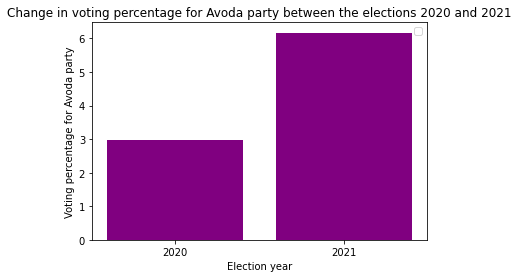

In [ ]:
x1 = ["2020","2021"]
y1 = [2.9761,6.1688]
plt.bar(x1, y1, color='purple')
plt.xlabel("Election year")
plt.ylabel("Voting percentage for Avoda party")
plt.title("Change in voting percentage for Avoda party between the elections 2020 and 2021")
plt.legend()
plt.show()

No handles with labels found to put in legend.


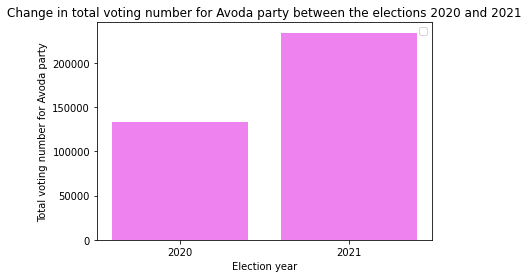

In [ ]:
x1 = ["2020","2021"]
y1 = [133740.000,234498]
plt.bar(x1, y1, color='violet')
plt.xlabel("Election year")
plt.ylabel("Total voting number for Avoda party")
plt.title("Change in total voting number for Avoda party between the elections 2020 and 2021")
plt.legend()
plt.show()

ניתן לראות הן לפי הגרפים והן לפי הטבלה המצורפת שבבחירות 2021 מפלגת העבודה הפכה ליותר פופולרית בקרב הבוחרים (בערך פי 2), ולפיכך גם זכתה ב7 מנדטים ב2021 לעומת 3 מנדטים בלבד ב2020. ניתן להסיק מכך, שכאשר מפלגת העבודה התמודדה לבדה בבחירות, ולא כחלק ממפלגת העבודה-גשר-מרץ, היא זכתה לאהדה רבה יותר ואחוז ההצבעה למפלגת העבודה עלה באופן ניכר.

חישוב קורלציות בין מפלגת העבודה לשאר המפלגות

מפת קורלציות

In [ ]:
# Data frame of the votes share:
parties_corr = df_2021_raw_cities[['מחל', 'פה', 'שס', 'כן', 'ב', 'אמת', 'ג', 'ל', 'ט', 'ודעם', 'ת', 'מרצ',
       'עם']].div(df_2021_raw_cities['כשרים'], axis = "rows")
parties_corr = parties_corr.corr()


In [ ]:
parties_dict_2021.values()

dict_values(['עבודה', 'מרצ', 'יהדות התורה', 'רעם', 'תקוה חדשה', 'הרשימה המשותפת', 'ימינה', 'הציונות הדתית', 'ישראל ביתנו', 'הליכוד', 'יש עתיד', 'כחול לבן', 'שס'])

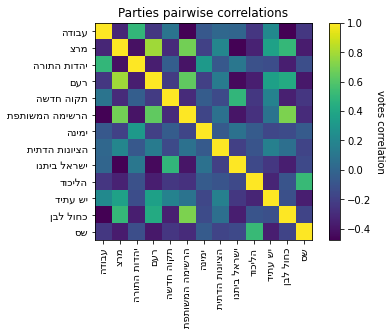

In [ ]:
def heatmap_corr(corr_mat, names):
    rev_names = [name[::-1] for name in list(parties_dict_2021.values())]
    fig, ax = plt.subplots()
    im = ax.imshow(corr_mat, cmap=plt.get_cmap('viridis'))
    n = corr_mat.shape[0]  # get number of variables 
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    plt.xticks(rotation = 90)
    ax.set_xticklabels(rev_names)
    ax.set_yticklabels(rev_names)
    ax.set_title("Parties pairwise correlations")
    
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax) #  **cbar_kw)
    cbar.ax.set_ylabel('votes correlation', rotation=-90, va="bottom")

    
# need to extract only top 8 parties 
heatmap_corr(parties_corr, parties_dict_2021.values())


סידור מפת קורלציות לפי שיוך פוליטי של המפלגות ע"מ שתהיה יותר אינפורמטיבית

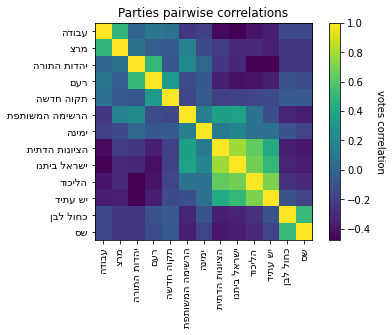

In [ ]:
names_new = [ 'ט','ב','מחל','שס', 'ג', 'ת','ל','כן','פה','אמת', 'מרצ','ודעם','עם']
parties_corr = df_2021_raw_cities[names_new].div(df_2021_raw_cities['כשרים'], axis = "rows")
parties_corr = parties_corr.corr()
heatmap_corr(parties_corr, parties_dict_2021.values())

טבלת קורלציות בין המפלגות

In [ ]:
parties_corr

,ט,ב,מחל,שס,ג,ת,ל,כן,פה,אמת,מרצ,ודעם,עם
ט,1.000000,0.492884,0.005197,0.106326,0.070588,-0.238505,-0.196263,-0.439017,-0.469687,-0.394397,-0.352631,-0.150724,-0.153382
ב,0.492884,1.000000,0.089160,-0.035776,-0.050004,0.176109,-0.149277,-0.221933,-0.294929,-0.295520,-0.348849,-0.238084,-0.243772
מחל,0.005197,0.089160,1.000000,0.500344,-0.071725,0.222894,0.013417,-0.238301,-0.319358,-0.473484,-0.479274,-0.242523,-0.242151
שס,0.106326,-0.035776,0.500344,1.000000,0.313594,-0.131478,-0.071719,-0.354170,-0.410305,-0.400999,-0.356800,-0.112853,-0.126476
ג,0.070588,-0.050004,-0.071725,0.313594,1.000000,-0.163502,-0.059320,-0.196928,-0.193389,-0.168116,-0.141872,-0.056488,-0.055199
ת,-0.238505,0.176109,0.222894,-0.131478,-0.163502,1.000000,0.162482,0.358840,0.366499,0.086105,-0.117729,-0.328207,-0.356645
ל,-0.196263,-0.149277,0.013417,-0.071719,-0.059320,0.162482,1.000000,0.133639,0.197292,0.074164,0.062431,-0.096735,-0.173822
כן,-0.439017,-0.221933,-0.238301,-0.354170,-0.196928,0.358840,0.133639,1.000000,0.789868,0.637611,0.426090,-0.357516,-0.381755
פה,-0.469687,-0.294929,-0.319358,-0.410305,-0.193389,0.366499,0.197292,0.789868,1.000000,0.687360,0.508048,-0.339491,-0.368946
אמת,-0.394397,-0.295520,-0.473484,-0.400999,-0.168116,0.086105,0.074164,0.637611,0.687360,1.000000,0.705943,-0.268545,-0.297853


גרף קורלציה בין עבודה למרץ

In [ ]:
# Show party votes for two parties
def two_parties_scatter(df, party1, party2):
    bzb = df_2021_raw_cities['בזב']
    s = [n/bzb.max()*200 for n in bzb]
    votes_per_city = df.sum(axis=1)
    party_share1 = df[party1] / votes_per_city
    party_share2 = df[party2] / votes_per_city

    plt.scatter(party_share1, party_share2, s = s, color='skyblue')  # Here draw circles with area proportional to city size
    plt.xlabel(party1[::-1])
    plt.ylabel(party2[::-1])
    plt.title('Scatter for two parties ' )
    plt.show()


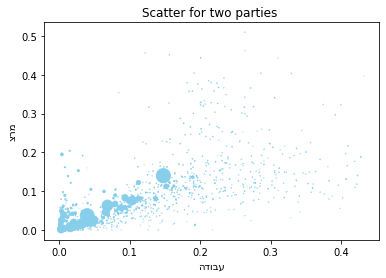

In [ ]:
two_parties_scatter(df_2021, "עבודה", "מרצ")

ביצענו ניתוח קורלציה בין המפלגות על מנת לנסות לזהות מתאמים חיובים או שליליים חזקים בין מפלגת העבודה לשאר המפלגות. לפי המפה ניתן לראות, כי למפלגת העבודה ישנה קורלציה חיובית חזקה מאד עם מפלגת מרצ השווה ל-0.705943 (חיפשנו את המשבצת בעלת הצבע הבהיר ביותר עבור השורה/עמודה הרלוונטית של מפלגת העבודה). לכן, בחרנו לבצע את המתאם של שתי המפלגות האלו בגרף נקודות כאשר גודל העיגולים יחסי לגודל הישובים.
לפי גרף הקורלציה בין מפלגת העבודה למרצ, ניתן לראות את הקורלציה החיובית החזקה בין המפלגות – כלומר אם ביישוב מסוים ישנה כמות גבוהה של מצביעי עבודה, סיכוי סביר שבישוב זה יהיה גם מספר גבוה של מצביעי מרצ, ולהיפך. לפיכך, נסיק שיש קשר ודמיון במצביעים לשתי מפלגות אלו.


##חלק ג

בניית גרפים עבור אחוז ההצבעה המקורי והמתוקן (לאחר ניפוח ל100% הצבעה) עבור מפלגת העבודה

תיקון מספרי הקולות בטבלה לפי התיקון שלמדנו
עבור טבלאות 2020 ו2021

In [ ]:
v = df_2021_raw_cities['כשרים'].div(df_2021_raw_cities['בזב'])
df_fix = df_2021.div(v , axis = 'rows')
df_fix.head(5)

par = df_fix.sum().div(df_fix.sum().sum()).sort_values(ascending=False)
par

הליכוד            0.239216
יש עתיד           0.132815
שס                0.070690
הרשימה המשותפת    0.067551
כחול לבן          0.062929
ישראל ביתנו       0.057051
עבודה             0.055351
ימינה             0.055206
יהדות התורה       0.054357
רעם               0.054131
הציונות הדתית     0.046350
תקוה חדשה         0.045565
מרצ               0.044429
יז                0.007648
ר                 0.003930
כך                0.000308
רנ                0.000261
ףז                0.000203
י                 0.000184
קץ                0.000173
רף                0.000136
זץ                0.000134
קך                0.000127
ינ                0.000120
נ                 0.000103
יק                0.000102
ני                0.000099
צי                0.000097
כ                 0.000096
ק                 0.000096
קי                0.000089
ץ                 0.000088
ז                 0.000080
צכ                0.000064
יר                0.000061
צף                0.000058
נר                0.000052
י

In [ ]:
v = df_2020_raw['כשרים'].div(df_2020_raw['בזב'])
df_fix = df_2020.div(v , axis = 'rows')
df_fix.head(5)

par = df_fix.sum().div(df_fix.sum().sum()).sort_values(ascending=False)
par

הליכוד            0.235895
יש עתיד           0.167717
כחול לבן          0.083733
הרשימה המשותפת    0.077400
שס                0.073256
ישראל ביתנו       0.058941
יהדות התורה       0.056055
עבודה גשר מרצ     0.054597
רעם               0.051600
תקוה חדשה         0.047292
ימינה             0.027538
עבודה             0.027299
מרצ               0.027299
עוצמה יהודית      0.003903
הציונות הדתית     0.003903
ז                 0.000716
נ                 0.000566
קץ                0.000302
ףז                0.000236
ק                 0.000215
כן                0.000178
ינ                0.000151
קך                0.000148
נז                0.000140
נק                0.000136
ץ                 0.000132
כ                 0.000106
קי                0.000097
יק                0.000085
ני                0.000074
י                 0.000068
יז                0.000066
יר                0.000057
יף                0.000050
זך                0.000047
זץ                0.000000
dtype: float64

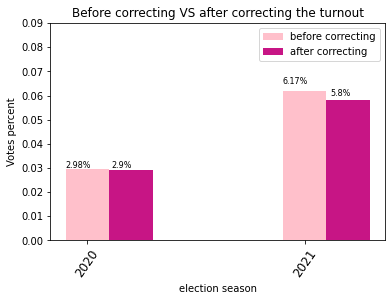

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2a88044190>)

In [ ]:
freq_lst=[0.029761,0.061688]
freq_lst_tikun=[0.028995,0.057993]

def three_bar2(value1,value2, title):
    width = 0.2  # set column width 
    names = ['2020', '2021']  
 
    fig, ax = plt.subplots() 

    labels=["before correcting","after correcting"]
    n1 = len(value1)
    bar_plt1 = ax.bar(np.arange(n1), value1,width, color='pink')
    bar_plt2 = ax.bar(np.arange(n1) + width, value2 , align='center',
                     ecolor='black', capsize=10, width=0.2, color='mediumvioletred')

    ax.set_ylabel('Votes percent')
    plt.ylim(0,0.09)

    ax.text(-0.1,0.03,str(round(value1[0]*100,2))+"%",size=8)
    ax.text(0.9,0.065,str(round(value1[1]*100,2))+"%",size=8)


    ax.text(-0.09+width,0.03,str(round(value2[0]*100,2))+"%",size=8)
    ax.text(0.92+width,0.06,str(round(value2[1]*100,2))+"%",size=8)


    ax.set_xlabel('election season')
    ax.set_xticks(np.arange(n1))
    ax.set_xticklabels(names, rotation=55, size= 12)
    ax.legend((bar_plt1[0], bar_plt2[0]), labels)
    ax.set_title(title)
    
    plt.show()

    return fig, ax
three_bar2(freq_lst,freq_lst_tikun,"Before correcting VS after correcting the turnout")

אחוז ההצבעה בישראל הוא גורם מכריע החורץ את גורלן של המפלגות במפה הפוליטית בכל מערכת בחירות. בסעיף זה, נדרשנו לבחון כיצד מפלגת העבודה מושפעת מאחוז ההצבעה במדינה. לצורך כך, בדקנו מה היה קורה לו 100% מבעלי זכות ההצבעה היו מצביעים בפועל בבחירות. תחילה, אמדנו בקירוב את מספר התומכים של מפלגת העבודה בכלל האוכלוסייה, ואת אחוז התומכים ליתר המפלגות. לאחר מכן, ביצענו תיקון, לפיו הנחנו ששיעור התומכים לכל מפלגה נשאר זהה עבור כל ישוב, ופרופורציונלי לגודל המפלגה. התיקון אותו ביצענו הוא למעשה "ניפוח" של אחוז ההצבעה בבחירות 2020 ו2021 ל100%. בחנו כיצד אחוז ההצבעה היה משנה את אחוז ההצבעה למפלגת העבודה.
*בנינו את הגרף הבא על בסיס קבצי נתונים עבור הישובים (2020 ו2021)


טעינת נתונים ועיבודם עבור החלקים הבאים

In [ ]:
# Read two elections data (by cities):
parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}

parties_dict_2020 ={'אמת' : "עבודה גשר מרצ", 'ג' : "יהדות התורה", 'ודעם'  : "הרשימה המשותפת"
    , 'טב'  : "ימינה", 'נץ'  : "עוצמה יהודית", 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "כחול לבן", 'שס'  : "שס"}

df_2021_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2020_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2020.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')

df_2021_raw.rename(columns=parties_dict_2021, inplace=True)
df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021 = df_2021[df_2021.columns[9:]] # removing "metadata" columns

df_2020_raw.rename(columns=parties_dict_2020, inplace=True)
df_2020_raw = df_2020_raw[df_2020_raw.columns[:-1]]
df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020 = df_2020[df_2020.columns[9:]] # removing "metadata" columns



In [ ]:
df_2020_ballot = df_2020_raw.reset_index()
df_2021_ballot = df_2021_raw.reset_index()
ballot_match = df_2020_ballot.set_index(['קלפי', 'סמל ישוב','שם ישוב']).join(df_2021_ballot.set_index(['קלפי', 'סמל ישוב','שם ישוב']), lsuffix = '-2020' , how='inner')

ballot_2021 = ballot_match[ballot_match.columns[len(df_2020_ballot.columns)-3:]]
ballot_2020 = ballot_match[ballot_match.columns[0:len(df_2020_ballot.columns)-3]]
ballot_2020.columns = df_2020_ballot.set_index(['קלפי', 'סמל ישוב','שם ישוב']).columns



In [ ]:

#Now we will merge the parties that are togeter in 2020 but were seperated in 2021:
parties_2020 = ballot_2020.copy()

#splitting to עבודה and מרצ 
parties_2020['מרצ'] = 0.5 *parties_2020['עבודה גשר מרצ']
parties_2020['עבודה'] = 0.5 *parties_2020['עבודה גשר מרצ']
parties_2020.drop('עבודה גשר מרצ', axis=1)
#splitting to רעם and המשותפת
parties_2020['רעם'] = 0.4 *parties_2020['הרשימה המשותפת']
parties_2020['הרשימה המשותפת'] = 0.6 *parties_2020['הרשימה המשותפת']
#splitting to תקוה חדשה and הליכוד
parties_2020['תקוה חדשה'] = 0.167 *parties_2020['הליכוד']
parties_2020['הליכוד'] = 0.833 *parties_2020['הליכוד']
#splitting to כחול לבן and יש עתיד
parties_2020['יש עתיד'] = 0.667 *parties_2020['כחול לבן']
parties_2020['כחול לבן'] = 0.333 *parties_2020['כחול לבן']
#splitting to ימינה and הציונות הדתית
parties_2020['הציונות הדתית'] = 0.4*parties_2020['ימינה']
parties_2020['ימינה'] = 0.6 *parties_2020['ימינה']
parties_2020['הציונות הדתית'] = parties_2020['הציונות הדתית']  + parties_2020['עוצמה יהודית']
parties_2020.drop('עוצמה יהודית', axis = 1)



סמל ועדה   ברזל  ...  יש עתיד  הציונות הדתית
קלפי סמל ישוב שם ישוב                            ...                        
3.0  472      אבו גוש                  2    738  ...   12.006            1.4
5.0  472      אבו גוש                  2    740  ...    4.002            1.4
8.0  472      אבו גוש                  2    743  ...    5.336            0.4
1.0  958      אבו עבדון שבט           18   9873  ...    0.000            0.0
     1342     אבו קרינאת יישוב        18   9878  ...   34.684            0.4
...                                  ...    ...  ...      ...            ...
2.0  709      תפרח                    18   9465  ...    1.334            0.8
1.0  665      תקומה                   18   9466  ...   42.021           67.2
     970      תראבין אצאנע שבט        18  10069  ...    2.668            0.0
     1346     תראבין אצאנעישוב        18  10070  ...    1.334            0.0
     778      תרום                     2    960  ...   43.355           36.0

[4614 rows x 43 columns]

# חלק ד

In [ ]:
raw2021=pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading cities data 2021
raw2020=pd.read_csv(io.BytesIO(uploaded['votes per city 2020.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading cities data 2020
df_socio = pd.read_excel(io.BytesIO(uploaded['eshkol_hevrati_calcali.xlsx']), index_col='name')
df_2021_raw_ballots = df_2021_raw_ballots[df_2021_raw_ballots.columns[0:-1]]




df_city = raw2021.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_city = df_city[df_city.columns[5:-1]] # removing "metadata" columns
df_city['סמל ישוב'] = raw2021['סמל ישוב']
df_city.rename(columns=parties_dict_2021, inplace=True)



In [ ]:

merged_df = df_city.join(df_socio.set_index('set_code'), on='סמל ישוב')
merged_df= merged_df.dropna()
merged_df.rename(columns=parties_dict_2021, inplace=True)
top_10 = (merged_df["עבודה"].div(merged_df[parties_dict_2021.values()].sum(axis=1), 0)).sort_values(ascending=False).head(10)
top10 = pd.concat([top_10, merged_df.loc[top_10.index]["eco_level"]], axis=1)
top10.columns = ["אחוז הצבעה", "אשכול"]
top10

,אחוז הצבעה,אשכול
שם ישוב,,
בית קשת,0.440252,6.0
גבעת חיים איחוד,0.431912,7.0
יטבתה,0.426914,3.0
צובה,0.426396,4.0
כיסופים,0.424837,6.0
כליל,0.421788,5.0
חוקוק,0.420139,6.0
בארי,0.413793,3.0
נווה איתן,0.413462,6.0


In [ ]:

bottom_10 = (merged_df["עבודה"].div(merged_df[parties_dict_2021.values()].sum(axis=1), 0)).sort_values(ascending=False).tail(10)
bottom10 = pd.concat([bottom_10, merged_df.loc[bottom_10.index]["eco_level"]], axis=1)
bottom10.columns = ["אחוז הצבעה", "אשכול"]
bottom10

,אחוז הצבעה,אשכול
שם ישוב,,
אבו קרינאת יישוב,0.0,1.0
כרמל,0.0,5.0
כרם יבנה ישיבה,0.0,3.0
חואלד,0.0,2.0
כוכב השחר,0.0,3.0
אביבים,0.0,6.0
שומריה,0.0,3.0
כלנית,0.0,7.0
סעוה,0.0,1.0


In [ ]:

avoda_p_eshkol_ballots = []
for eshkol in range(10):

  df_eshkol = merged_df.iloc[np.where(merged_df['eco_level']==eshkol+1)][parties_dict_2021.values()]
  p_eshkol= df_eshkol.sum()/df_eshkol.sum().sum()
  avoda_p_eshkol_ballots.append(p_eshkol['עבודה'])





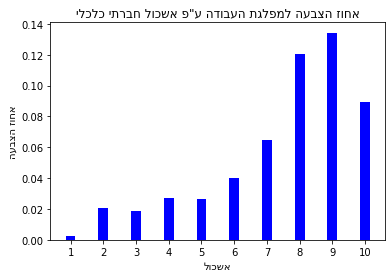

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2a880f0710>)

In [ ]:
def party_bar(p_socio):
    width = 0.3  # set column width 
    n = 10

    fig, ax = plt.subplots()  # plt.subplots()

    p_all = ax.bar(np.arange(n), p_socio, width, color='b')

    ax.set_ylabel('אחוז הצבעה'[::-1])
    ax.set_xlabel('אשכול'[::-1])
    ax.set_title('אחוז הצבעה למפלגת העבודה ע"פ אשכול חברתי כלכלי'[::-1])
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(range(1,11))

    plt.show()

    return fig, ax
party_bar(avoda_p_eshkol_ballots)


# חלק ה

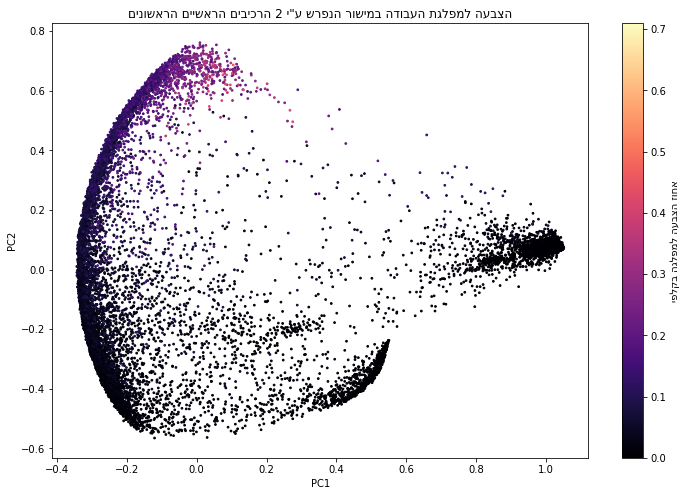

In [ ]:
pca = PCA(n_components=2)  # define PCA object

df_pca = df_2021_ballots[parties_dict_2021.values()]
d = df_pca.reset_index().iloc[:,1:]
avoda_turnout = d.div(d.sum(axis=1), axis=0)['עבודה']


df_pca_norm = normalize(df_pca.T, axis=0)

color = avoda_turnout
color.index = df_2021_raw[df_2021_raw.index != 'מעטפות חיצוניות'].reset_index().set_index(['קלפי', 'סמל ישוב','שם ישוב']).index
x_pca = pca.fit_transform(df_pca_norm.T)  # Perform PCA transformation
fig, ax = plt.subplots(figsize=(12,8))
sc = ax.scatter(x_pca[:, 0], x_pca[:, 1], c=color, cmap='magma', s=3)

ax.set_title('הצבעה למפלגת העבודה במישור הנפרש ע"י 2 הרכיבים הראשיים הראשונים'[::-1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.colorbar(sc, label="אחוז הצבעה למפלגה בקלפי"[::-1])
plt.show()


In [ ]:
turnout_2020 = parties_2020[parties_dict_2021.values()].div(parties_2020[parties_dict_2021.values()].sum(axis=1), axis=0)['עבודה']
turnout_2021 = ballot_2021[parties_dict_2021.values()].div(ballot_2021[parties_dict_2021.values()].sum(axis=1), axis=0)['עבודה']
diff = turnout_2021 - turnout_2020



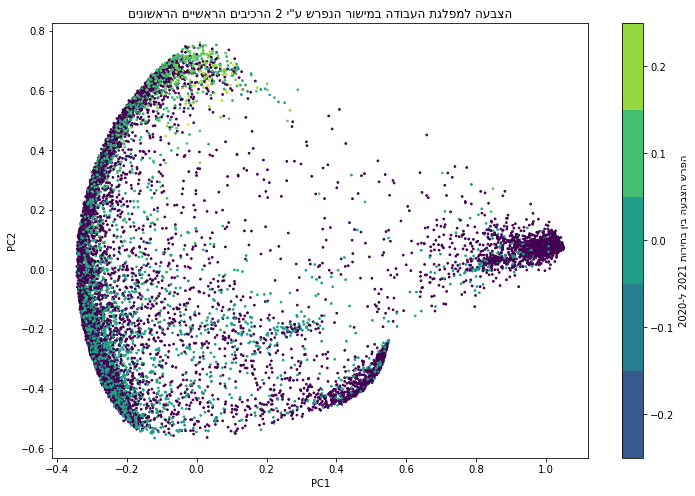

In [ ]:
color_2 = pd.DataFrame(color).join(diff, lsuffix = '-2020' , how='left')['עבודה']
color_2[color_2.isnull()] = -0.4
fig, ax = plt.subplots(figsize=(12,8))
sc = ax.scatter(x_pca[:, 0], x_pca[:, 1], c=color_2, cmap='viridis', s=3)

ax.set_title('הצבעה למפלגת העבודה במישור הנפרש ע"י 2 הרכיבים הראשיים הראשונים'[::-1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.colorbar(sc, label="הפרש הצבעה בין בחירות 1202 ל-0202"[::-1],  values= [x / 10 for x in range(-2, 3)])

plt.show()


# חלק ו 
עיבוד נתונים


In [ ]:
df_2020_ballot = df_2020_raw.reset_index()
df_2021_ballot = df_2021_raw.reset_index()
df_2020_ballot = df_2020_ballot[df_2020_ballot["שם ישוב"]!="מעטפות חיצוניות"]
df_2021_ballot = df_2021_ballot[df_2021_ballot["שם ישוב"]!="מעטפות חיצוניות"]

ballot_match = df_2020_ballot.set_index(['קלפי', 'סמל ישוב','שם ישוב']).join(df_2021_ballot.set_index(['קלפי', 'סמל ישוב','שם ישוב']), lsuffix = '-2020' , how='inner')
ballot_2021 = ballot_match[ballot_match.columns[len(df_2020_ballot.columns)-3:]]
ballot_2020 = ballot_match[ballot_match.columns[0:len(df_2020_ballot.columns)-3]]
ballot_2020.columns = df_2020_ballot.set_index(['קלפי', 'סמל ישוב','שם ישוב']).columns


In [ ]:
ballot_2020["לא הצביעו"]=ballot_2020["בזב"]-ballot_2020["כשרים"]
ballot_2021["לא הצביעו"]=ballot_2021["בזב"]-ballot_2021["כשרים"]
ballot_2020.rename(columns=parties_dict_2020, inplace=True)
ballot_2021.rename(columns=parties_dict_2021, inplace=True)
df_2020 = ballot_2020[parties_dict_2020.values()]
df_2021 = ballot_2021[parties_dict_2021.values()]
df_2020["לא הצביעו"] = ballot_2020["לא הצביעו"]
df_2021["לא הצביעו"] = ballot_2021["לא הצביעו"]# Calculating for regular


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

חישוב מטריצת מעבר כפי שראינו בכיתה

In [ ]:
# Calculating for regular

parties_2020 = df_2020.columns
parties_2021 = df_2021.columns

#creating matrix of votes
Y = df_2021.values
X = df_2020.values

# Calculating M

M = np.linalg.inv(X.T @ X) @X.T @ Y 
M_2 = pd.DataFrame(np.where(M < 0.005, 0, M))
M_2 =M_2.div(M_2.sum(axis = 1), 0)
M_2.index = parties_2020
M_2.columns = parties_2021

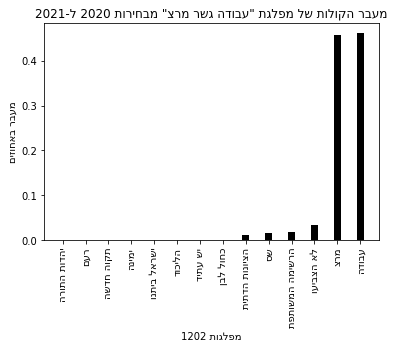

In [ ]:
width = 0.3  # set column width 
n = len(parties_2021)

fig, ax = plt.subplots()  # plt.subplots()

p = ax.bar(np.arange(n), M_2.loc["עבודה גשר מרצ"].sort_values(), width, color='black')

ax.set_ylabel('מעבר באחוזים'[::-1])
ax.set_xlabel('מפלגות 2021'[::-1])
ax.set_title('מעבר הקולות של מפלגת "עבודה גשר מרצ" מבחירות 0202 ל-1202'[::-1])
ax.set_xticks(np.arange(n))
ax.set_xticklabels([b[::-1] for b in M_2.loc["עבודה גשר מרצ"].sort_values().index], rotation=90)

plt.show()


# חלק ז

In [ ]:
# creating the election pie plot graph
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} votes)".format(pct, absolute)
parties = ["העבודה","מרצ"]

# parties name
for i in range(len(parties)):
  parties[i]=parties[i][::-1]

def pier(pie_data,title,year):
  # Creating plot
  fig, ax = plt.subplots(figsize =(10, 7))
  wedges, texts, autotexts = ax.pie(pie_data,
                                    autopct = lambda pct: func(pct, pie_data),
                                    labels = parties,
                                    shadow = True,
                                    colors = colors,
                                    startangle = 90,
                                    textprops = dict(color ="black"))
  
  # Adding legend
  ax.legend(wedges, parties,
            title =year,
            loc ="center left",
            bbox_to_anchor =(1, 0, 0.5, 1))
  
  plt.setp(autotexts, size = 8, weight ="bold")
  ax.set_title(year + " " + title[::-1])
  
  # show plot
  plt.show()

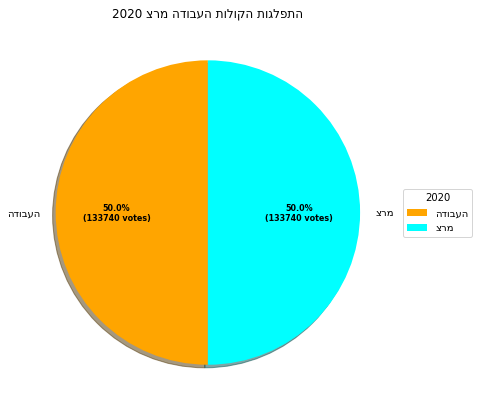

In [ ]:
# creating a pie plot for the 2020 elections for מרצ & העבודה
pie_data = [df_2020_raw["עבודה גשר מרצ"].sum()/2,df_2020_raw["עבודה גשר מרצ"].sum()/2]
colors = ( "orange", "cyan")

pier(pie_data,"התפלגות הקולות העבודה מרצ","2020")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



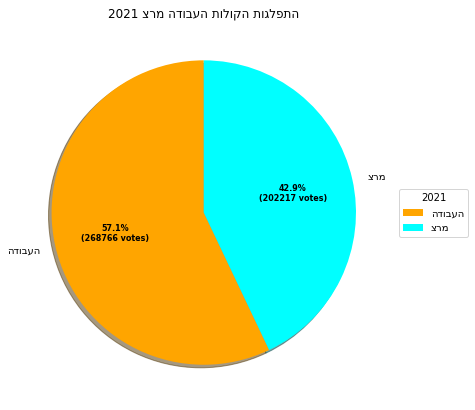

In [ ]:
# creating 2021 pie plot for מרצ & העבודה
df_2021_raw[["עבודה","מרצ"]].sum()
pie_data = [df_2021_raw[["עבודה","מרצ"]].sum()]
colors = ( "orange", "cyan")

pier(pie_data,"התפלגות הקולות העבודה מרצ","2021")

We will now return to our clean data to in order to find the transaction of votes between the parties

In [ ]:
def corr_heat_map(M, parties_2020, parties_2021,title):
    n_20 = len(parties_2020)
    n_21 = len(parties_2021)

    fig, ax = plt.subplots(figsize = (9,9))
    im = ax.imshow(M, cmap=plt.get_cmap('Reds'))

    ax.set_title(title[::-1])
    ax.set_xticks(np.arange(n_21))
    ax.set_yticks(np.arange(n_20))
    # And to label them with the relevant parties names
    ax.set_xticklabels([n[::-1] for n in parties_2021])
    ax.set_yticklabels([n[::-1] for n in parties_2020])
    ax.set_xlabel("2021")
    ax.set_ylabel("2020")

    # Loop over data dimensions to create text annotations.
    for i in range(n_20):
        for j in range(n_21):
            text = ax.text(j, i, round(M[i, j],2), ha="center", va="center", color="black")

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('votes probability', rotation=-90, va="bottom")
    plt.xticks(rotation=-90,size=12)
    plt.yticks(size=12)


    plt.show()



Finding the changes in voting references

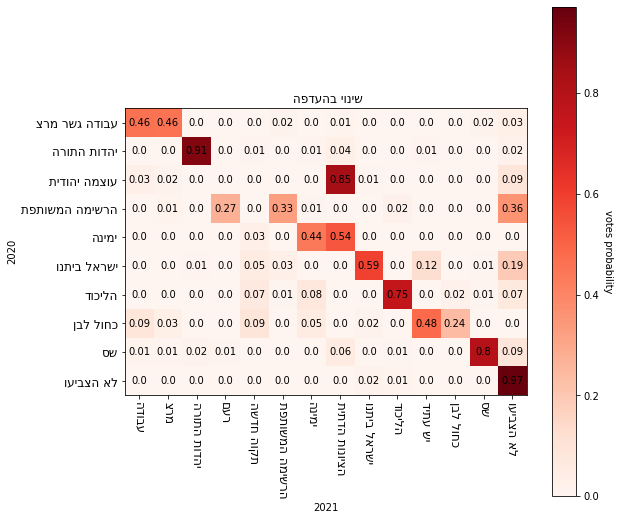

In [ ]:
# Calculating for regular

parties_2020 = df_2020.columns
parties_2021 = df_2021.columns

#creating matrix of votes
Y = df_2021.values
X = df_2020.values

# Calculating M

M = np.linalg.pinv(X.T @ X) @X.T @ Y 
M_2 = pd.DataFrame(np.where(M < 0.005, 0, M))
M_2 =M_2.div(M_2.sum(axis = 1), 0)
corr_heat_map(M_2.values, parties_2020, parties_2021,"שינוי בהעדפה ")

votes_dis=df_2020.sum().values*M_2[0]


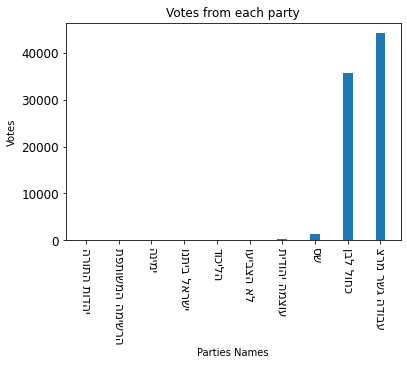

In [ ]:
# bar-plot:
d = {'votes': votes_dis, 'parties names': df_2020.columns}
df_bar = pd.DataFrame(data=d).sort_values(by="votes")
width = 0.3  # set column width 
n = X.shape[1]  # number of parties
names = df_bar["parties names"]
rev_names = [name[::-1] for name in list(names)]

fig, ax = plt.subplots()  # plt.subplots()

mse_bar = ax.bar(np.arange(n), np.array(df_bar["votes"]), width)

ax.set_ylabel('Votes')
ax.set_xlabel('Parties Names')
ax.set_title('Votes from each party')
ax.set_xticks(np.arange(n))
ax.set_xticklabels(rev_names)
plt.xticks(rotation=-90,size=12)
plt.yticks(size=12)
plt.show()


In [ ]:
# creating the election pie plot graph
df_mapping = pd.DataFrame({
    'parties names': ['עוצמה יהודית', 'שס', 'ימינה','עבודה גשר מרצ','כחול לבן','לא הצביעו'],
})
sort_mapping = df_mapping.reset_index().set_index('parties names')
df_bar['par_num'] = df_bar['parties names'].map(sort_mapping['index'])
df_pie=df_bar.sort_values('par_num')
df_pie = df_pie[df_pie["votes"]>0]
parties = df_pie["parties names"].values

# parties name
for i in range(len(parties)):
  parties[i]=parties[i][::-1]

def pier(pie_data,title,year):
  # Creating plot
  fig, ax = plt.subplots(figsize =(13, 10))
  wedges, texts, autotexts = ax.pie(pie_data,
                                    autopct = lambda pct: func(pct, pie_data),
                                    labels = parties,
                                    shadow = False,
                                    colors =["lightblue","lightblue","lightgreen","lightgreen"],
                                    startangle = 35,
                                    explode = [0.05,0.2,0.05,0.05],
                                    textprops={'fontsize': 14,'color' : "black"})
  
  # Adding legend
  ax.legend(wedges, parties,
            title =year,
            loc ="center left",
            bbox_to_anchor =(1, 0, 0.5, 1))
  
  plt.setp(autotexts, size = 12, weight ="bold")
  ax.set_title(year + " " + title[::-1])
  
  # show plot
  plt.show()

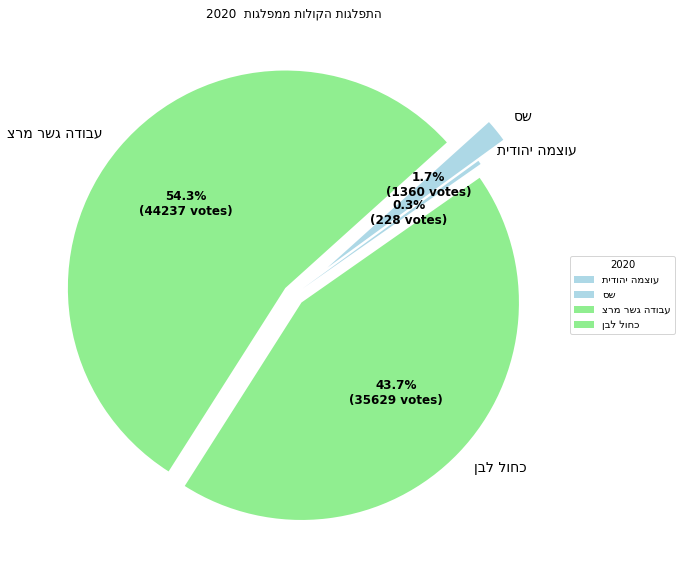

In [ ]:
pier(df_pie["votes"],"התפלגות הקולות ממפלגות ","2020")

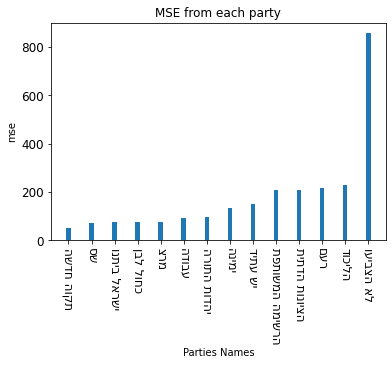

In [ ]:

# Calculating residuals:
res = X @ M - Y
mse = sum(np.power(res,2))/res.shape[0]

# bar-plot:
d = {'mse': mse, 'parties names': df_2021.columns}
df_bar = pd.DataFrame(data=d).sort_values(by="mse")
width = 0.2  # set column width 
names = df_bar["parties names"]
n = len(names)  # number of parties
rev_names = [name[::-1] for name in list(names)]

fig, ax = plt.subplots()  # plt.subplots()

mse_bar = ax.bar(np.arange(n), np.array(df_bar["mse"]), width)

ax.set_ylabel('mse')
ax.set_xlabel('Parties Names')
ax.set_title('MSE from each party')
ax.set_xticks(np.arange(n))
ax.set_xticklabels(rev_names)
plt.xticks(rotation=-90,size=12)
plt.yticks(size=12)
plt.show()


### When we dont include didn't vote



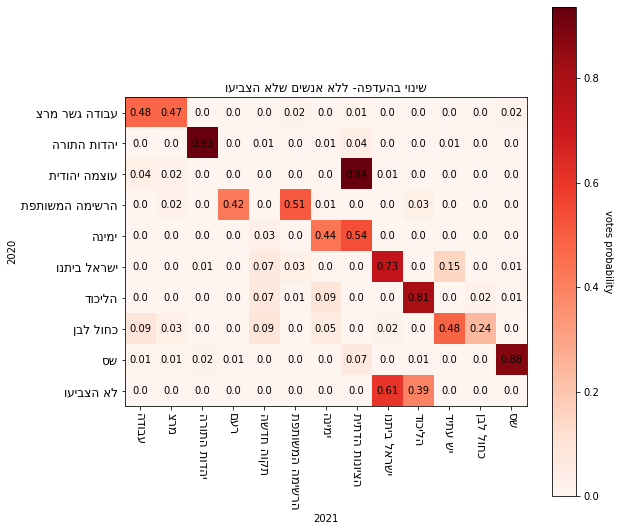

In [ ]:
# Calculating for combined
df_2021_com = df_2021.copy()
df_2021_com=df_2021_com.drop(["לא הצביעו"],axis=1)

parties_2020 = df_2020.columns
parties_2021 = df_2021_com.columns

#creating matrix of votes
X = df_2020.values
Y = df_2021_com.values

# Calculating M
M = np.linalg.pinv(X.T @ X) @X.T @ Y 
M_2 = pd.DataFrame(np.where(M < 0.005, 0, M))
M_2 =M_2.div(M_2.sum(axis = 1), 0)
corr_heat_map(M_2.values, parties_2020, parties_2021,"שינוי בהעדפה- ללא אנשים שלא הצביעו")


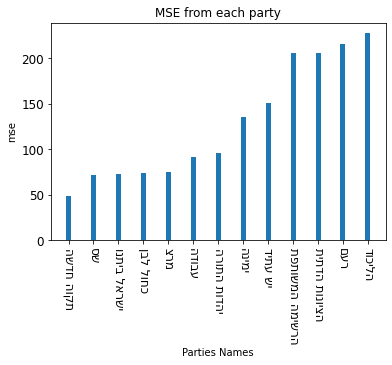

In [ ]:

# Calculating residuals:
res = X @ M - Y
mse = sum(np.power(res,2))/res.shape[0]

# bar-plot:
d = {'mse': mse, 'parties names': df_2021_com.columns}
df_bar = pd.DataFrame(data=d).sort_values(by="mse")
width = 0.2  # set column width 
names = df_bar["parties names"]
n = len(names)  # number of parties
rev_names = [name[::-1] for name in list(names)]

fig, ax = plt.subplots()  # plt.subplots()

mse_bar = ax.bar(np.arange(n), np.array(df_bar["mse"]), width)

ax.set_ylabel('mse')
ax.set_xlabel('Parties Names')
ax.set_title('MSE from each party')
ax.set_xticks(np.arange(n))
ax.set_xticklabels(rev_names)
plt.xticks(rotation=-90,size=12)
plt.yticks(size=12)
plt.show()


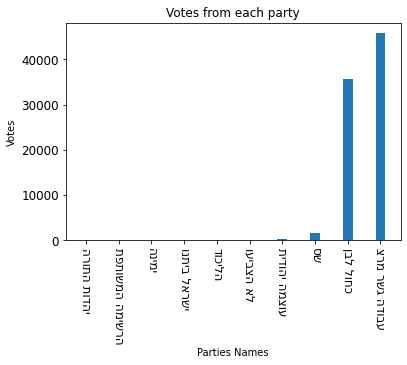

In [ ]:
# bar-plot:
votes_dis=df_2020.sum().values*M_2[0]
d = {'votes': votes_dis, 'parties names': df_2020.columns}
df_bar = pd.DataFrame(data=d).sort_values(by="votes")
width = 0.3  # set column width 
n = X.shape[1]  # number of parties
names = df_bar["parties names"]
rev_names = [name[::-1] for name in list(names)]

fig, ax = plt.subplots()  # plt.subplots()

mse_bar = ax.bar(np.arange(n), np.array(df_bar["votes"]), width)

ax.set_ylabel('Votes')
ax.set_xlabel('Parties Names')
ax.set_title('Votes from each party')
ax.set_xticks(np.arange(n))
ax.set_xticklabels(rev_names)
plt.xticks(rotation=-90,size=12)
plt.yticks(size=12)
plt.show()


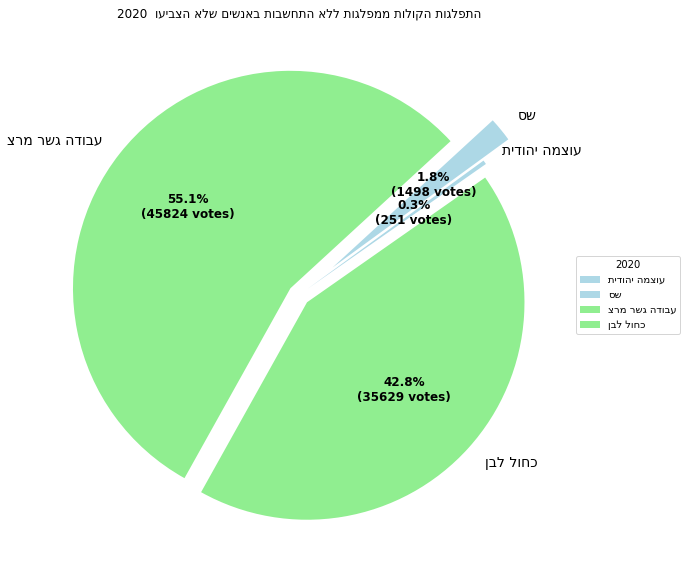

In [ ]:
# creating the election pie plot graph
df_mapping = pd.DataFrame({
    'parties names': ['עוצמה יהודית', 'שס', 'ימינה','עבודה גשר מרצ','כחול לבן','לא הצביעו'],
})
sort_mapping = df_mapping.reset_index().set_index('parties names')
df_bar['par_num'] = df_bar['parties names'].map(sort_mapping['index'])
df_pie=df_bar.sort_values('par_num')
df_pie = df_pie[df_pie["votes"]>0]
parties = df_pie["parties names"].values

# parties name
for i in range(len(parties)):
  parties[i]=parties[i][::-1]

pier(df_pie["votes"],"התפלגות הקולות ממפלגות ללא התחשבות באנשים שלא הצביעו ","2020")

# Sus Ballots

### Part A from Lab 7
this is taken from the solution so we don't add extra explanation

In [ ]:
df_2021_raw = pd.read_csv('votes per ballot 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2020_raw = pd.read_csv('votes per ballot 2020.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')

df_2021_raw.rename(columns=parties_dict_2021, inplace=True)
df_2021_raw = df_2021_raw[df_2021_raw.columns[:]]
df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021 = df_2021[df_2021.columns[9:]] # removing "metadata" columns

df_2020_raw.rename(columns=parties_dict_2020, inplace=True)
df_2020_raw = df_2020_raw[df_2020_raw.columns[:-1]]
df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020 = df_2020[df_2020.columns[9:]] # removing "metadata" columns


In [ ]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

total_votes = parties_votes_percents(df_2021, 0.035)  # total votes for each party
names = total_votes.keys() # largest parties

total_votes_2020 = parties_votes_percents(df_2020, 0.035)  # total votes for each party
names_2020 = total_votes_2020.keys().tolist() # largest parties
names_2020.append('עוצמה יהודית')

In [ ]:
df_2020_ballot = df_2020_raw.reset_index()
df_2021_ballot = df_2021_raw.reset_index()
ballot_match = df_2020_ballot.set_index(['קלפי', 'סמל ישוב','שם ישוב']).join(df_2021_ballot.set_index(['קלפי', 'סמל ישוב','שם ישוב']), lsuffix = '-2020' , how='inner')

ballot_2021 = ballot_match[ballot_match.columns[len(df_2020_ballot.columns)-3:]]
ballot_2020 = ballot_match[ballot_match.columns[0:len(df_2020_ballot.columns)-3]]
ballot_2020.columns = df_2020_ballot.set_index(['קלפי', 'סמל ישוב','שם ישוב']).columns
ballot_2020.head(5)

סמל ועדה  ברזל  ריכוז  שופט  ...  קי  קך  קץ  שס
קלפי סמל ישוב שם ישוב                                        ...                
3.0  472      אבו גוש                  2   738      2     0  ...   0   0   1   6
5.0  472      אבו גוש                  2   740      2     0  ...   0   0   0   2
8.0  472      אבו גוש                  2   743      2     0  ...   0   0   0   0
1.0  958      אבו עבדון שבט           18  9873      1     0  ...   0   0   0   0
     1342     אבו קרינאת יישוב        18  9878      2     0  ...   0   0   0   0

[5 rows x 38 columns]

In [ ]:
#Now we will merge the parties that are togeter in 2020 but were seperated in 2021:
parties_2020 = ballot_2020.copy()

#splitting to עבודה and מרצ 
parties_2020['מרצ'] = 0.5 *parties_2020['עבודה גשר מרצ']
parties_2020['עבודה'] = 0.5 *parties_2020['עבודה גשר מרצ']
parties_2020.drop('עבודה גשר מרצ', axis=1)
#splitting to רעם and המשותפת
parties_2020['רעם'] = 0.4 *parties_2020['הרשימה המשותפת']
parties_2020['הרשימה המשותפת'] = 0.6 *parties_2020['הרשימה המשותפת']
#splitting to תקוה חדשה and הליכוד
parties_2020['תקוה חדשה'] = 0.167 *parties_2020['הליכוד']
parties_2020['הליכוד'] = 0.833 *parties_2020['הליכוד']
#splitting to כחול לבן and יש עתיד
parties_2020['יש עתיד'] = 0.667 *parties_2020['כחול לבן']
parties_2020['כחול לבן'] = 0.333 *parties_2020['כחול לבן']
#splitting to ימינה and הציונות הדתית
parties_2020['הציונות הדתית'] = 0.4*parties_2020['ימינה']
parties_2020['ימינה'] = 0.6 *parties_2020['ימינה']
parties_2020['הציונות הדתית'] = parties_2020['הציונות הדתית']  + parties_2020['עוצמה יהודית']
parties_2020.drop('עוצמה יהודית', axis = 1)

#only perties + normalization:
parties_2020 = parties_2020[parties_2020.columns[8:]]
parties_2020 = parties_2020.div(parties_2020.sum(axis = 1), axis = 0)
parties_2020.head(5)

עבודה גשר מרצ  ...  הציונות הדתית
קלפי סמל ישוב שם ישוב                          ...               
3.0  472      אבו גוש                0.008721  ...       0.004070
5.0  472      אבו גוש                0.039855  ...       0.005072
8.0  472      אבו גוש                0.019608  ...       0.001569
1.0  958      אבו עבדון שבט          0.000000  ...       0.000000
     1342     אבו קרינאת יישוב       0.026471  ...       0.001176

[5 rows x 36 columns]

In [ ]:
#only perties + normalization:
parties_2021 = ballot_2021.copy()

parties_2021 = parties_2021[parties_2021.columns[8:]]
parties_2021 = parties_2021.div(parties_2021.sum(axis = 1), axis= 0)


### part B & C from lab 7

In [ ]:
small_cities = ballot_2021.groupby('שם ישוב').sum()
small_cities = small_cities.iloc[np.where(small_cities['בזב']<= 50000)]

Find the top 10 ballots for each election-

In [ ]:
def diff_calc(df):
  mean_city = df.mean(axis=0)
  diff = df - mean_city
  return diff

# for 2020
parties_2020_small = parties_2020.iloc[np.where(parties_2020.index.get_level_values(2).isin(small_cities.index))]
top_10_2020 = ((parties_2020_small.groupby('שם ישוב').apply(lambda x: diff_calc(x)))**2).sum(axis=1).nlargest(10)
print(top_10_2020)

קלפי   סמל ישוב  שם ישוב    
60.0   1061      נוף הגליל      0.640518
40.0   8000      צפת            0.588992
57.0   6700      טבריה          0.582042
951.0  8500      רמלה           0.520959
50.0   8500      רמלה           0.519249
950.0  8500      רמלה           0.516820
28.0   1063      מעלותתרשיחא    0.516307
18.1   7000      לוד            0.481976
8.0    7000      לוד            0.480856
5.0    7000      לוד            0.477839
dtype: float64


In [ ]:
# for 2021
parties_2021_small = parties_2021.iloc[np.where(parties_2021.index.get_level_values(2).isin(small_cities.index))]
top_10_2021 = ((parties_2021_small.groupby('שם ישוב').apply(lambda x: diff_calc(x)))**2).sum(axis=1).nlargest(10)
print(top_10_2021)

קלפי   סמל ישוב  שם ישוב    
60.0   1061      נוף הגליל      0.704431
28.0   1063      מעלותתרשיחא    0.584095
951.0  8500      רמלה           0.577244
57.0   6700      טבריה          0.569885
50.0   8500      רמלה           0.558536
950.0  8500      רמלה           0.485840
8.0    7000      לוד            0.474154
952.1  7000      לוד            0.450754
19.0   8000      צפת            0.436000
18.1   7000      לוד            0.435595
dtype: float64


### c)
10 ballots with the largest total squared difference between their voting shares for the 13 big parties in the two elections

In [ ]:
top_10_c = ((parties_2020[names]-parties_2021[names])**2).sum(axis=1).nlargest(10)
top_10_c

קלפי   סמל ישוב  שם ישוב         
1.0    1366      נווה                1.006268
12.0   1054      תל שבע              0.589479
623.0  3000      ירושלים             0.581476
1.0    1363      בני נצרים           0.579312
       1375      אבו תלול            0.577604
       1347      קצר אסר             0.577384
3.0    965       אטרש שבט            0.562058
1.0    1265      שומריה              0.554367
2.0    1375      אבו תלול            0.550187
1.0    1342      אבו קרינאת יישוב    0.545274
dtype: float64

###Part D from lab7

### Only מרצ & עבודה

In [ ]:
rel_parties = ['מרצ','עבודה']
top_10_d = ((parties_2020[rel_parties]-parties_2021[rel_parties])**2).sum(axis=1).nlargest(10)
top_10_d

קלפי  סמל ישוב  שם ישוב        
1.0   648       מצר                0.121723
      2018      גבעת חיים איחוד    0.115946
2.0   72        גן שמואל           0.105148
1.0   695       מגן                0.104958
      1197      נאות סמדר          0.101425
2.0   2018      גבעת חיים איחוד    0.101294
1.0   1209      חרשים              0.095760
      1156      סמר                0.095348
      1112      יודפת              0.094517
      777       נחשון              0.092141
dtype: float64

### All coaliton

In [ ]:
rel_parties = ['רעם','יש עתיד','מרצ','עבודה','כחול לבן','ישראל ביתנו','תקוה חדשה','ימינה']
top_10_d_all = ((parties_2020[rel_parties]-parties_2021[rel_parties])**2).sum(axis=1).nlargest(10)
top_10_d_all

קלפי  סמל ישוב  שם ישוב         
1.0   1342      אבו קרינאת יישוב    0.363588
8.0   1192      ערערהבנגב           0.310108
1.0   1347      קצר אסר             0.297632
3.0   965       אטרש שבט            0.291623
2.0   965       אטרש שבט            0.287039
1.0   1375      אבו תלול            0.283740
12.0  1054      תל שבע              0.279264
1.0   1169      הוואשלה שבט         0.269897
      1360      סעוה                0.269426
15.0  1161      רהט                 0.251137
dtype: float64

In [ ]:
dec_ave = np.mean(((parties_2020[rel_parties]-parties_2021[rel_parties])**2).sum(axis=1))
dec_99 = np.percentile(((parties_2020[rel_parties]-parties_2021[rel_parties])**2).sum(axis=1), 99) 

In [ ]:
ballot_2020_with_bzb = ballot_2020.iloc[np.where(ballot_2020['בזב']!=0)]
ballot_2021_with_bzb = ballot_2021.iloc[np.where(ballot_2021['בזב']!=0)]

ballot_2021_with_bzb['אחוז הצבעה'] = ballot_2021_with_bzb['כשרים']/ballot_2021_with_bzb['בזב']
ballot_2020_with_bzb['אחוז הצבעה'] = ballot_2020_with_bzb['כשרים']/ballot_2020_with_bzb['בזב']
turnout = (ballot_2021_with_bzb['אחוז הצבעה'] + ballot_2020_with_bzb['אחוז הצבעה'])/2 
top_10_e = turnout.nlargest(10) # drop inf and find largest
ballot_2021_with_bzb['אחוז הפסולים'] = ballot_2021_with_bzb['פסולים']/ballot_2021_with_bzb['בזב']
ballot_2020_with_bzb['אחוז הפסולים'] = ballot_2020_with_bzb['פסולים']/ballot_2020_with_bzb['בזב']
psulim = (ballot_2021_with_bzb['אחוז הפסולים'] + ballot_2020_with_bzb['אחוז הפסולים'])/2 
mean_psul = np.mean(psulim) # drop inf and find largest
psulim_diff =  (ballot_2021_with_bzb.loc[top_10_d.index]['אחוז הפסולים']+ ballot_2020_with_bzb.loc[top_10_d.index]['אחוז הפסולים'])/2 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
def bar_plots(parties_2020, parties_2021, tops, names,seif_b = False, Y_2021 = False,lines = True):
  fig, ax = plt.subplots(2, 5, figsize=(20,10))
  width = 0.3  # set column width 

  votes_2020 = parties_2020[names].loc[tops]  # total votes for each party
  if seif_b:
    wanted_cities = tops.get_level_values(2)
    votes_2021 = parties_2020.reset_index().set_index('שם ישוב').loc[wanted_cities[0]].groupby('שם ישוב').mean()[names] # normalize by number of ballots in city

    for city in wanted_cities[1:]:
      votes_2021 = votes_2021.append(parties_2020.reset_index().set_index('שם ישוב').loc[city].groupby('שם ישוב').mean()[names] ) # need to normalize

  else:
    votes_2021 = parties_2021[names].loc[tops]  # do not normalize 

  rev_names = [name[::-1] for name in list(names)]
  n = len(names) 

  for ballot in range(10):
    up=max(list(votes_2020.iloc[ballot]))
    down=min(list(votes_2020.iloc[ballot]))
    down_99 = down-dec_99
    if down_99<0:
      down_99 = 0
    title_top = str(tops[ballot][0]) +" " + str(tops[ballot][1]) + " " +tops[ballot][2][::-1]
    bar_2020 = ax[ballot//5, ballot%5].bar(np.arange(n), list(votes_2020.iloc[ballot]), width, color='b')
    bar_2021 = ax[ballot//5, ballot%5].bar(np.arange(n)+width, list(votes_2021.iloc[ballot]), width, color='r')
    ax[ballot//5, ballot%5].set_title(title_top, fontsize=14)
    if lines:
      ax[ballot//5, ballot%5].axhline(y=up+dec_ave, color='purple', linestyle='--')
      ax[ballot//5, ballot%5].axhline(y=down-dec_ave, color='purple', linestyle='--')
      ax[ballot//5, ballot%5].axhline(y=up+dec_99, color='red', linestyle='-')
      ax[ballot//5, ballot%5].axhline(y=down_99, color='red', linestyle='-')

    ax[ballot//5, ballot%5].set_xticks(np.arange(n))
    ax[ballot//5, ballot%5].set_xticklabels(rev_names, rotation=90)

# pad the spacing between the number and the edge of the figure
    
  for ax in ax.flat:
    ax.set_ylabel('Votes percent')

  plt.tight_layout()
  plt.show()


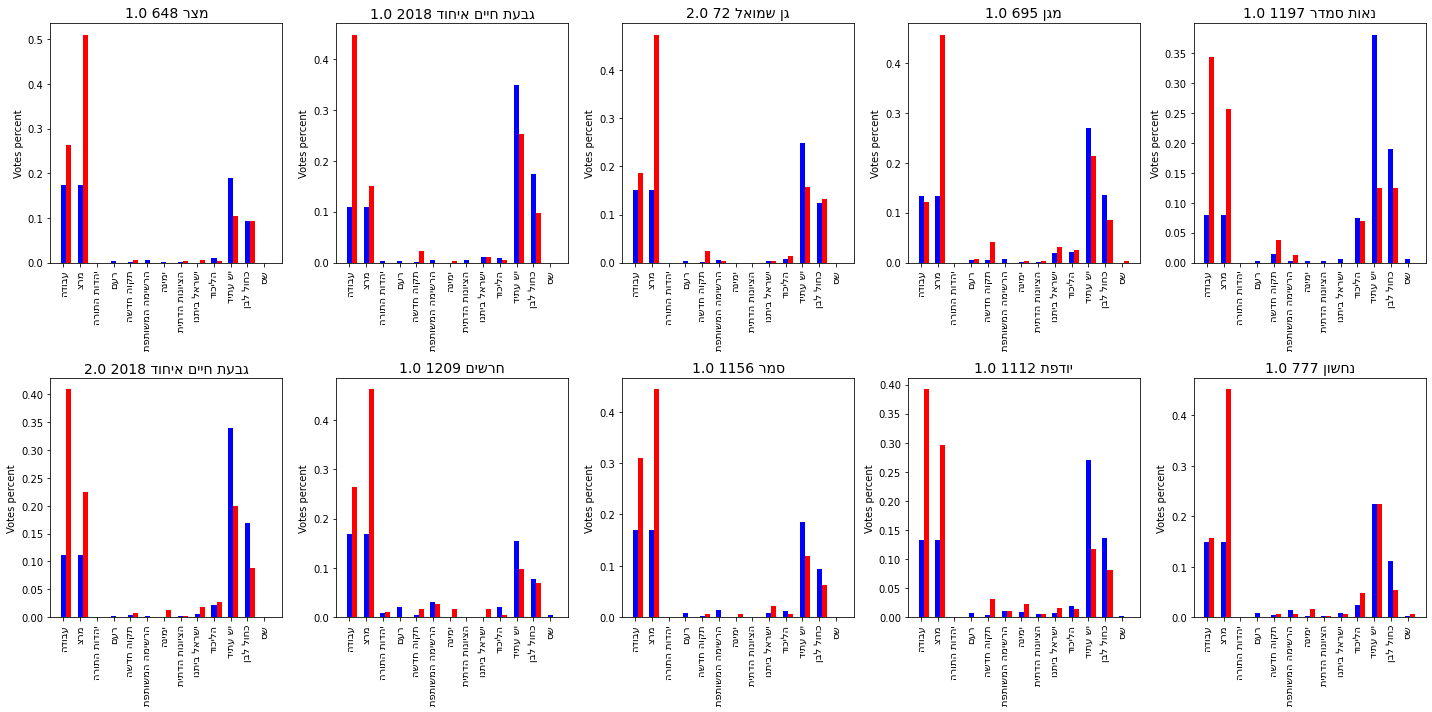

In [ ]:
bar_plots(parties_2020, parties_2021, top_10_d.index, parties_dict_2021.values(),lines=False)

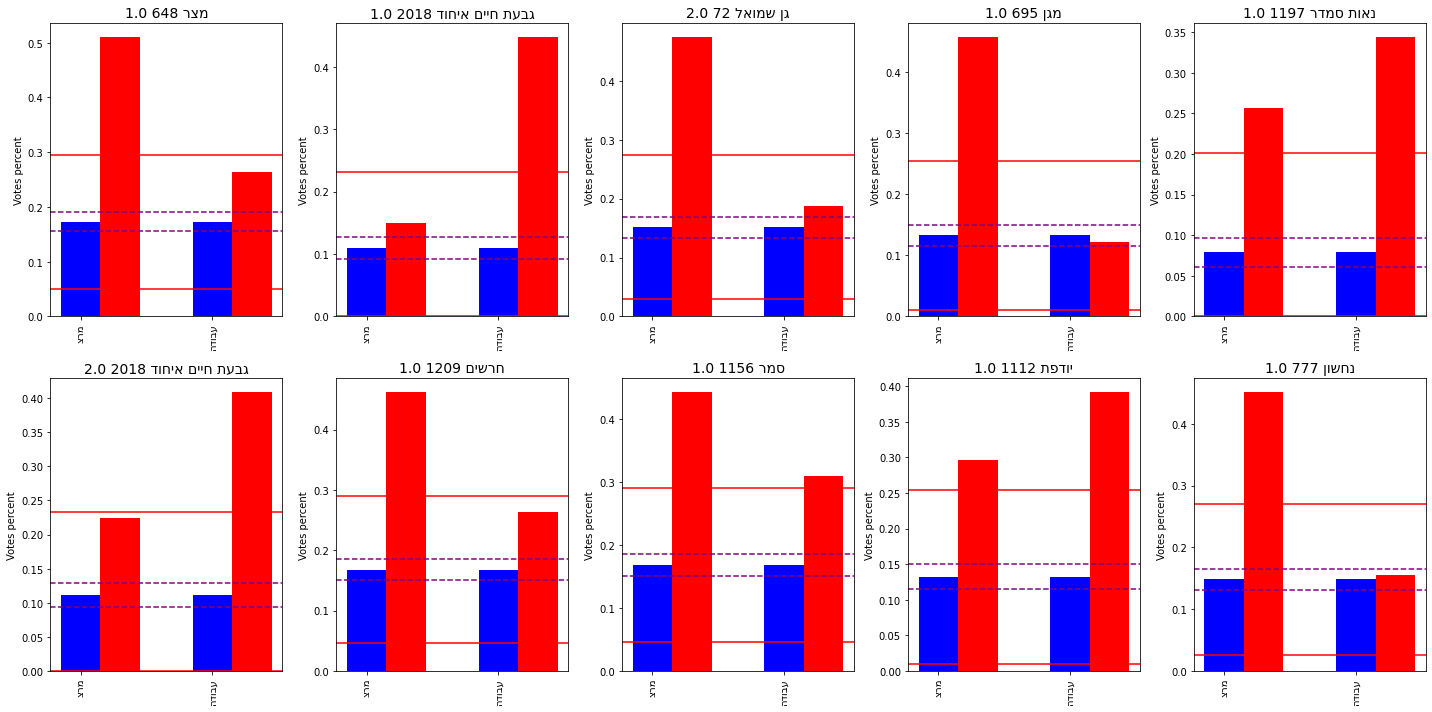

In [ ]:
bar_plots(parties_2020, parties_2021, top_10_d.index, ["מרצ","עבודה"])